In [8]:
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3

In [9]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("speedups.txt")

In [10]:
coupling_map = CouplingMap.from_line(32)
transpilers = [
    SabreMS(
        coupling_map, use_fast_settings=False, name="SABREMS-SlowSerial", parallel=False
    ),
    SabreMS(
        coupling_map, use_fast_settings=True, name="SABREMS-FastSerial", parallel=False
    ),
    SabreMS(
        coupling_map,
        use_fast_settings=False,
        name="SABREMS-SlowParallel",
        parallel=True,
    ),
    SabreMS(
        coupling_map, use_fast_settings=True, name="SABREMS-FastParallel", parallel=True
    ),
    QiskitLevel3(coupling_map),
]

In [11]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    num_runs=1,
)
benchmark.run()

Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]

Loading qft_n4 from QASMBench


Circuits from library:  25%|██▌       | 1/4 [00:34<01:43, 34.34s/it]

Loading qft_n8 from MQTBench


Circuits from library:  50%|█████     | 2/4 [01:32<01:36, 48.40s/it]

Loading qft_n16 from MQTBench


Circuits from library:  75%|███████▌  | 3/4 [04:02<01:34, 94.55s/it]

Loading qft_n32 from MQTBench


Circuits from library: 100%|██████████| 4/4 [12:47<00:00, 191.78s/it]


In [12]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'total_runtime': {'average_change': -46.44827300039811,
  'best_circuit': 'qft_n32',
  'worst_circuit': 'qft_n4'}}

In [13]:
benchmark.summary_statistics(transpilers[2], transpilers[3])

{'total_runtime': {'average_change': -16.913214645713225,
  'best_circuit': 'qft_n16',
  'worst_circuit': 'qft_n4'}}

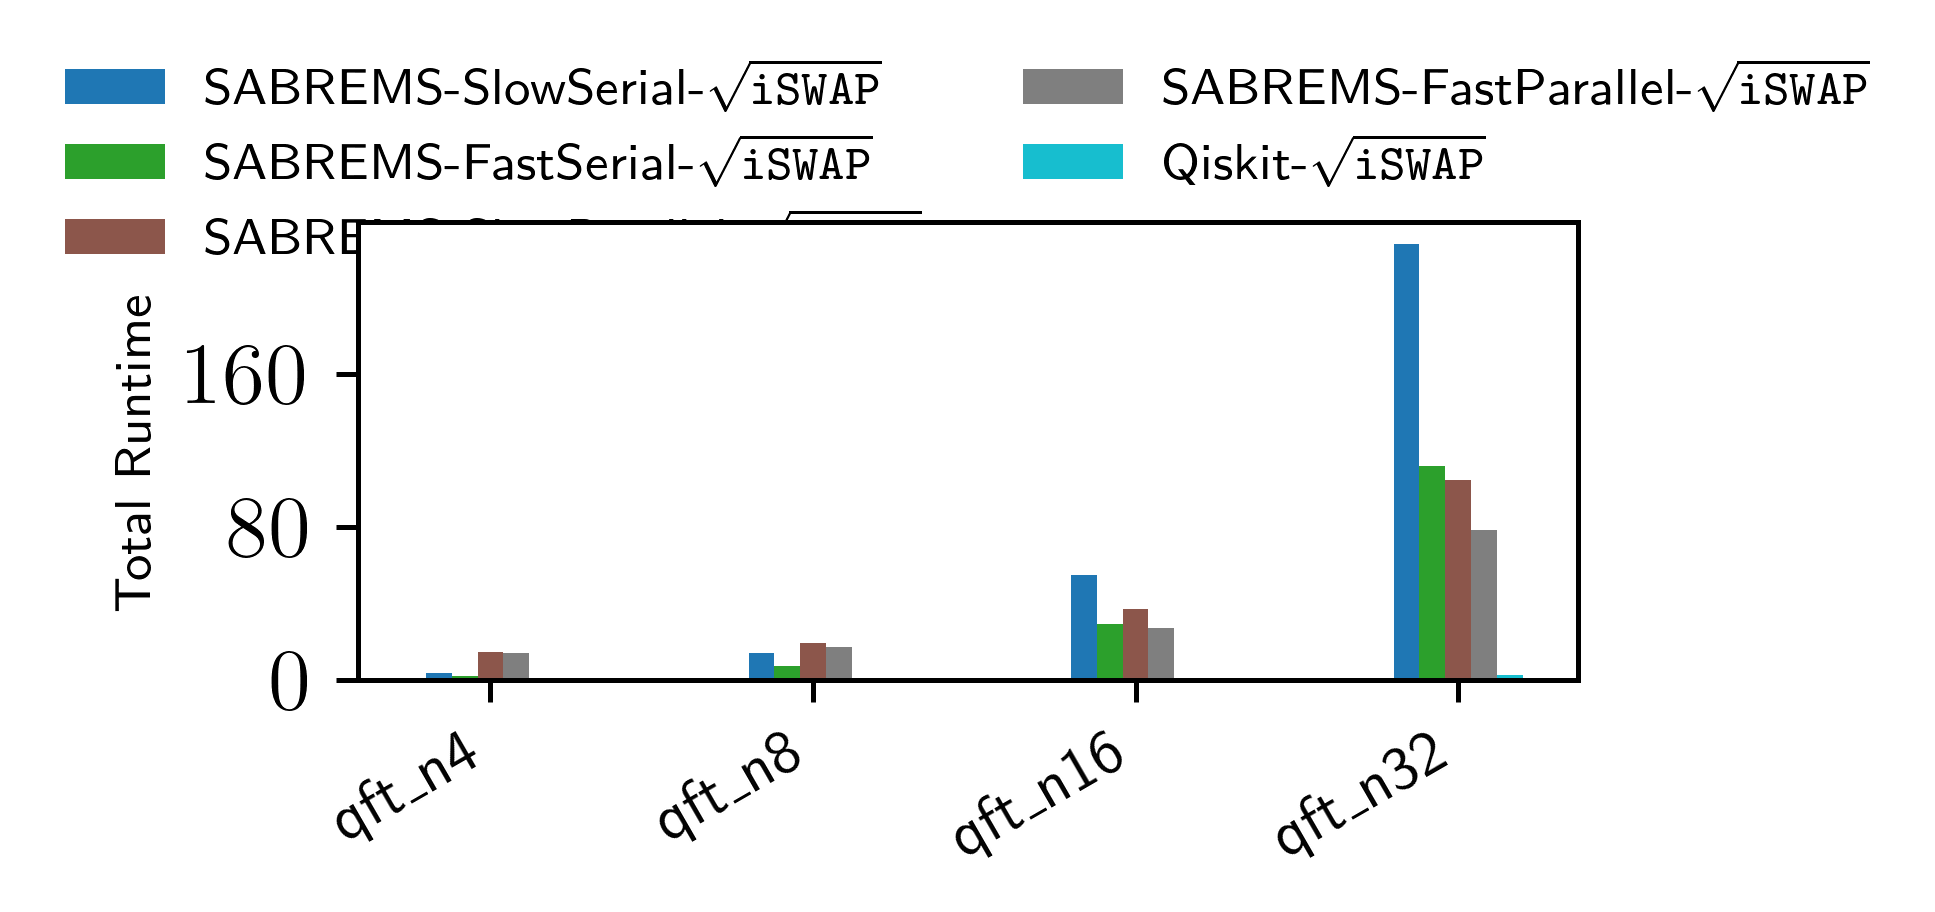

In [14]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="speed")